<a href="https://colab.research.google.com/github/Ngoson2004/Deep-Learning-for-Vietnamese/blob/main/Logistic_Regression_for_VietnamBankCustomer_dataset_Week1_ForwardProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hồi quy Logistics (Logistic Regression)

#Tuần 1: Tải dữ liệu và Lan truyền tịnh tiến

HỒi quy Logistic, hay còn gọi là Logistic Regression, là một trong những thuật toán cơ bản nhất của Học máy. Logistic Regression thường được sử dụng để phân loại một đối tượng dựa trên những đặc điểm có sẵn của đối tượng đấy. Ví dụ, một bác sĩ muốn làm xét nghiệm trên bệnh nhân bị bệnh về u bướu. Khối u đó có thể lành tính hoặc ác tính.

Logistic regression có thể được áp dụng vào việc xét nghiệm này, vì nó có thể phân loại khối u thành 2 nhóm: lành tính hoặc ác tính, dựa trên việc xử lí những dữ liệu có sẵn về khối u như kích cỡ và vị trí.


Trong notebook này, chúng ta sẽ sử dụng thuật toán Logistic Regression để dự đoán khả năng một nguời có gửi tiền vào ngân hàng theo kì hạn hay không. Ta sẽ dựa vào một số thông tin như là tuổi, số dư ngân hàng, trình độ học vấn, vv.

## Mục lục

## 1. Khởi động


Trước tiên, ta phải nhập về các thư viện và hàm cần thiết

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

import io
import requests

Mỗi thư viện và hàm bên trên có công dụng như sau:

* **sklearn.model_selection.train_test_split**

Đặc điểm: Đây là một hàm trong thư viện scikit-learn, một trong những thư viện phổ biến nhất cho máy học trong Python.

Công dụng: Hàm train_test_split được sử dụng để chia dữ liệu thành hai phần: dữ liệu huấn luyện (training) và dữ liệu kiểm tra (testing).

* **Numpy**

Đặc điểm: numpy là một thư viện cho Python, cung cấp hỗ trợ cho các mảng và ma trận lớn, cùng với nhiều hàm toán học cấp cao để thao tác với các mảng này.

Công dụng: numpy được sử dụng để thực hiện các phép tính toán học và logic trên các mảng và ma trận.

* **pandas**

Đặc điểm: pandas là một thư viện cung cấp các cấu trúc dữ liệu và công cụ phân tích dữ liệu mạnh mẽ cho ngôn ngữ lập trình Python.

Công dụng: pandas được sử dụng để thao tác và phân tích dữ liệu. Nó cung cấp các cấu trúc dữ liệu như Series (1D) và DataFrame (2D) để dễ dàng xử lý và phân tích dữ liệu từ nhiều nguồn khác nhau như CSV, SQL, Excel, và hơn thế nữa.

* **tqdm.notebook.tqdm_notebook**

Đặc điểm: tqdm là một thư viện cho phép tạo ra các thanh tiến trình (progress bars) để theo dõi tiến độ của các vòng lặp (loops) trong Python.

Công dụng: tqdm_notebook được sử dụng để hiển thị các thanh tiến trình trong môi trường Jupyter Notebook, giúp người dùng dễ dàng theo dõi tiến độ của các vòng lặp dài hoặc các quá trình tính toán kéo dài.

* **matplotlib.pyplot**

Đặc điểm: matplotlib là một thư viện vẽ đồ thị và biểu đồ 2D cho Python. pyplot là một mô-đun trong matplotlib cung cấp một giao diện giống như MATLAB cho việc vẽ đồ thị.

Công dụng: matplotlib.pyplot được sử dụng để tạo ra các biểu đồ và đồ thị như biểu đồ đường, biểu đồ cột, biểu đồ tán xạ và nhiều loại biểu đồ khác.

Bây giờ chúng ta nhập data. Chúng ta sẽ cho bạn thấy data mà chúng ta chuẩn bị làm việc này trông như thế nào.

In [2]:
df_url = "https://storage.googleapis.com/skill-pixel-bucket-public-training-data/course-1/user3/BankCustomerData.csv"

df = pd.read_csv(io.BytesIO(requests.get(df_url).content))
#df.head()
print(df.head())

   ID  age           job  marital  education  default  balance  housing  loan  \
0   1   58    management        2   tertiary        0     2143        1     0   
1   2   44    technician        1  secondary        0       29        1     0   
2   3   33  entrepreneur        2  secondary        0        2        1     1   
3   4   47   blue-collar        2    unknown        0     1506        1     0   
4   5   33       unknown        1    unknown        0        1        0     0   

   day month  duration  campaign  pdays  previous  term_deposit  
0    5   may       261         1     -1         0             0  
1    5   may       151         1     -1         0             0  
2    5   may        76         1     -1         0             0  
3    5   may        92         1     -1         0             0  
4    5   may       198         1     -1         0             0  


In [3]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [4]:
np.shape(df)

(42639, 16)

Như bạn đã thấy, thuật toán của chúng ta có thể dự đoán một người có gửi tiền hay không dựa vào những số liệu như tuổi, nghề nghiệp, số dư ngân hàng, vv. Tổng cộng ta có gần 43 nghìn hàng và 16 cột.

Nếu bạn để ý, ta có một cột "term_deposit". Cột này được gọi là **ground-truth label**, hay còn gọi là "sự thật nền tảng". Đúng như tên gọi của nó, model sẽ lấy cột này làm nền tảng cho việc dự đoán, vì nó là kết quả cuối cùng ghi lại được của một người: cô ấy/ anh ấy có gửi tiền hay không.

Bây giờ chúng ta sẽ bắt đầu xử lí data

## 2. Xây mô hình Neural Network dùng thuật toán Logistic Regression



Khi đã chuẩn bị data xong, ta sẽ thực hiện Logistic Regression trên data. Và để sự dụng Logistic Regression một cách hiệu quả, ta cần phải xây dựng một thứ gọi là Neural Network (mạng lưới neuron). Mạng lưới này có nhiệm vụ dự đoán một người có gửi tiền hay không dựa trên những thông tin ta truyền vào nó. Đây là một mạng lưới có khả năng học máy (machine learning). Nói cách khác, ta cho Neural Network tiếp xúc với data, và chúng sẽ tự cải thiện khả năng của mình bằng cách điều chỉnh các tham số tương úng. Quá trình này gọi là training.

Nếu bạn vẫn thấy khó hiểu, đừng lo, ta sẽ cùng nhau làm rõ các khái niệm ở các phần tiếp theo.

NOTE: ở phần tiếp theo, chúng ta sẽ dùng từ model thay cho Neural Network. Nghĩa của
chúng tương tự nhau.


---



### 2a. Cấu trúc
Model của chúng ta sắp xây sẽ có cấu trúc như sau:

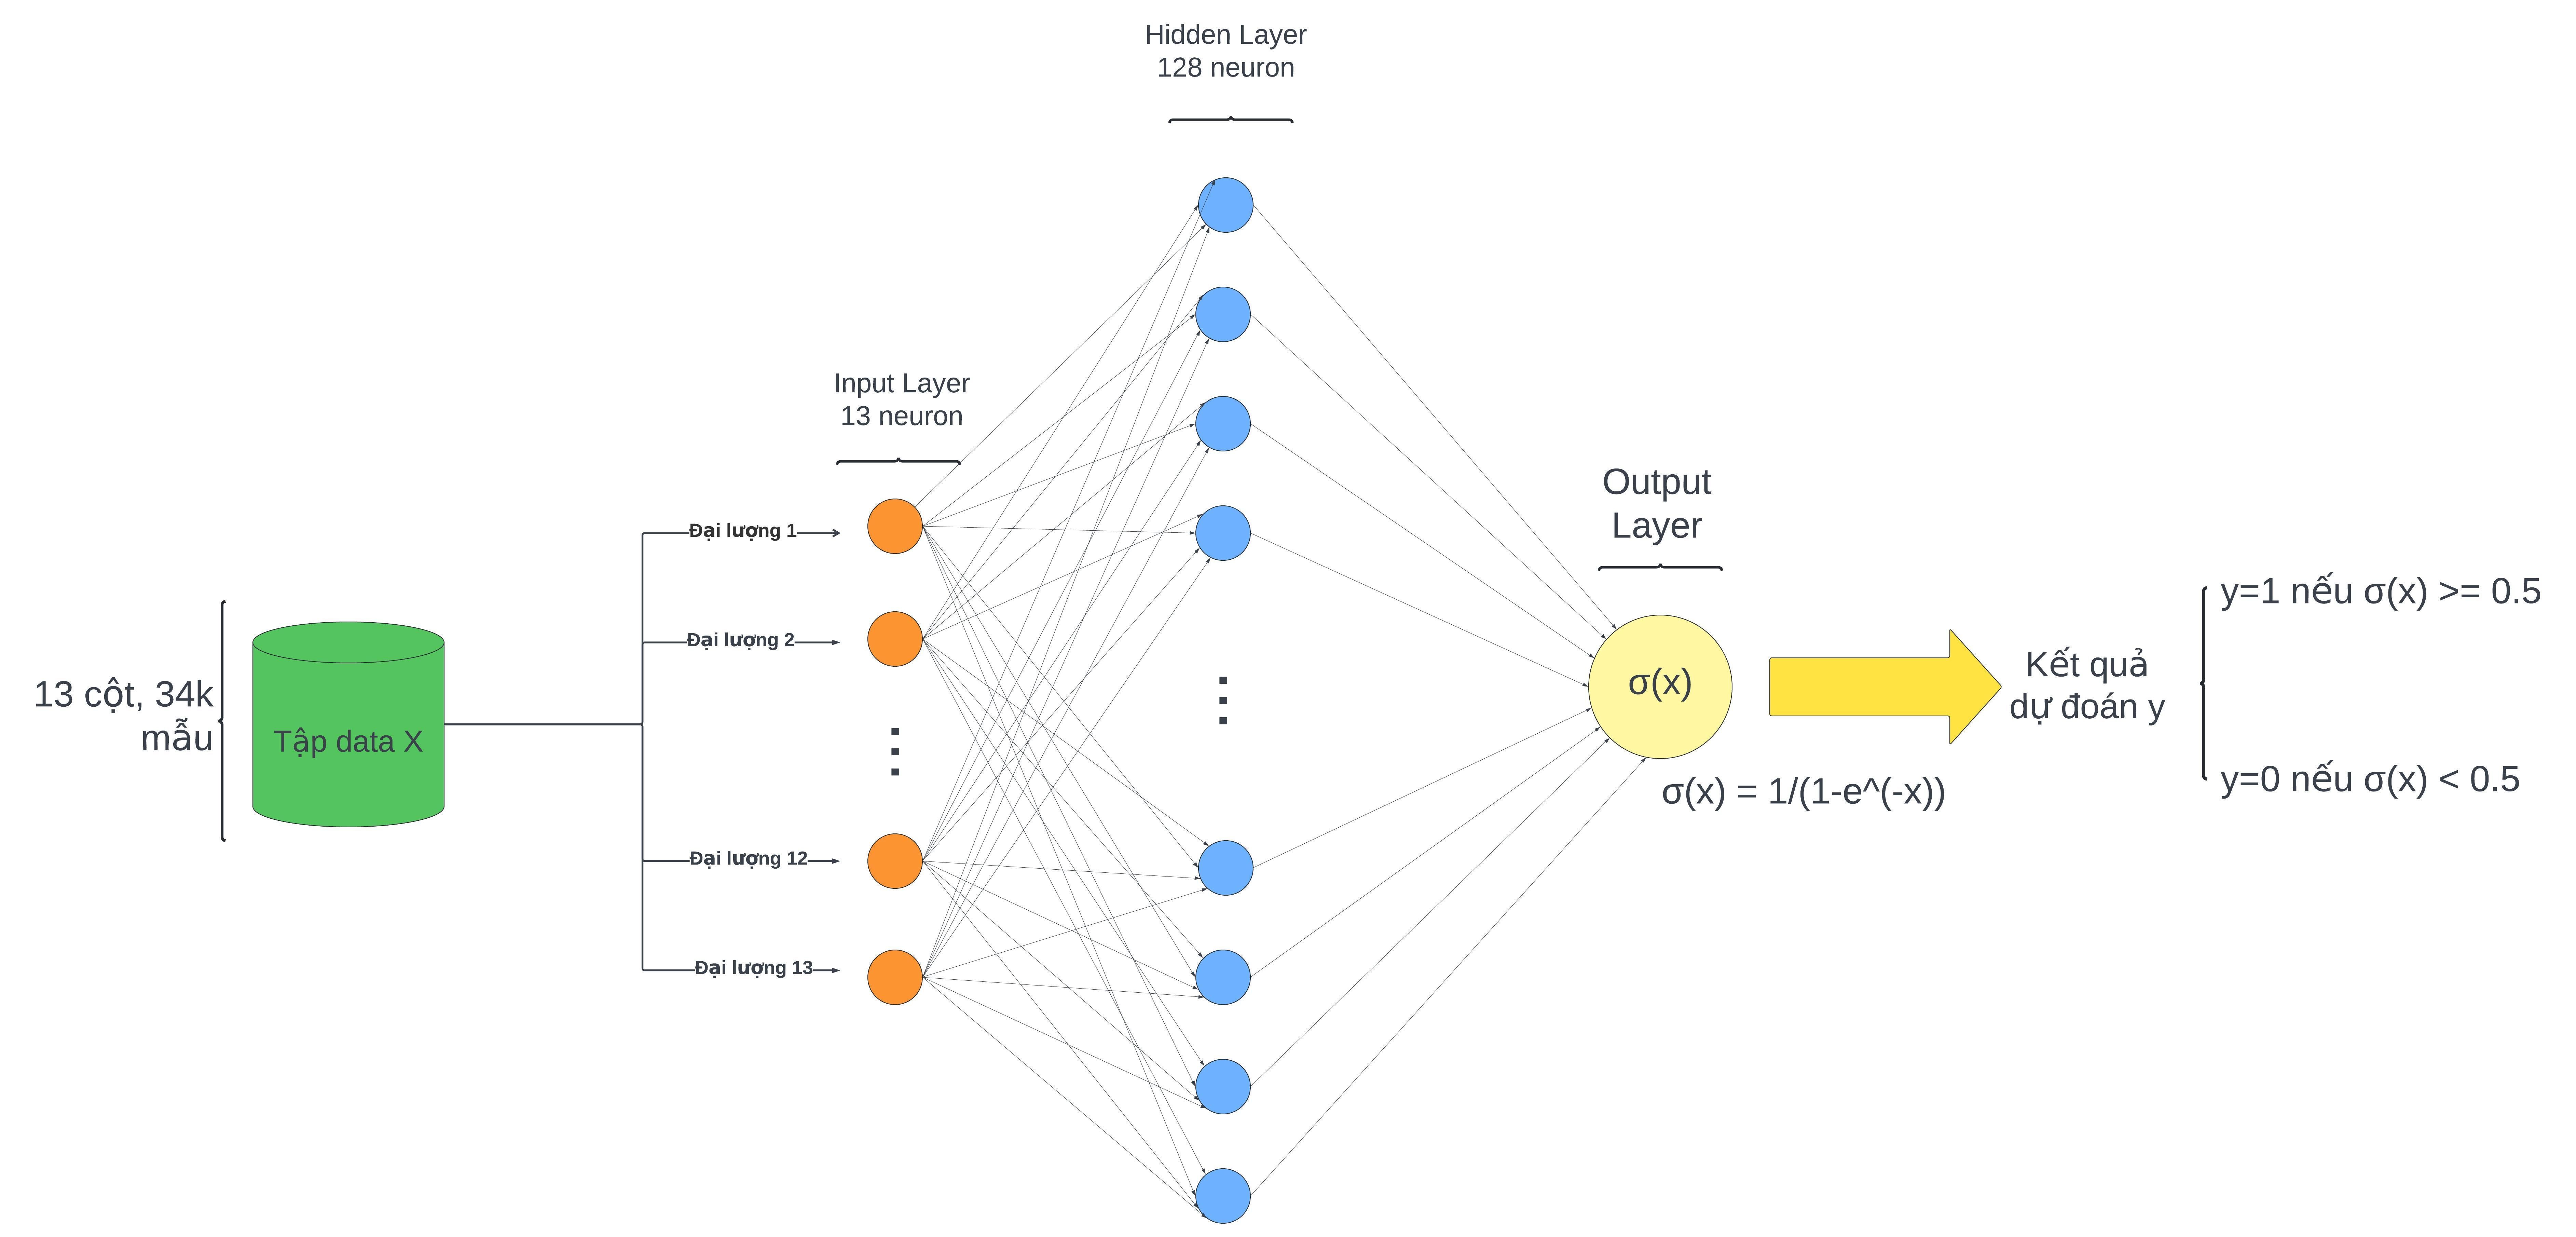

*Ảnh 4. Cấu trúc của Neural Network đơn giản*

Neural Network được tạo nên bởi các lớp (layer) khác nhau, mỗi layer gồm nhiều đơn vị, gọi là neuron. Mỗi neuron này đại diện cho một phương trình toán học và các tham số tương ứng. Neural Network bao gồm 3 kiểu lớp chính:
*   Lớp đầu vào (Input layer): Đây là lớp tiếp nhận data để bắt đầu quá trình phát triển thuật toán. Số neuron ở lớp này bằng với số cột trong data của chúng ta. Từ đó, mỗi neuron sẽ phụ trách xử lí một đại lượng.
*   Lớp ẩn (Hidden layer): Neural Network có thể bao gồm 1 hoặc nhiều lớp ẩn. Các lớp này sẽ tiếp nhận kết quả tính toán dưới dạng vector từ lớp đầu vào, rồi tiếp tục tính toán và điều chỉnh tham số ở các neuron.
*   Lớp đầu ra (Output layer): Lớp đầu ra sẽ bao gồm duy nhất 1 neuron, chịu trách nhiệm đưa ra kết quả dự đoán cuối cùng.

### 2b. Cơ chế
Đối với bài toán Binary Classification, ta dùng 3 phương trình chính sau đây cho model.

1. ### Linear
\begin{equation} y = wx + b \end{equation}

Đây sẽ là phương trình được dùng chủ yếu trong các neuron của Input Layer và Hidden Layer. x là data đầu vào, y là kết quả, còn **w** và **b** là những tham số. Cụ thể hơn, ta gọi w là **trọng số** (w), còn b là **độ thiên lệch** (bias). Mục tiêu của Neural Network chính là điều chỉnh w và b sao cho y đạt được như mong muốn.

Weight và bias là 2 đại lượng rất quan trọng trong AI nói chung và machine learning nói riêng. Giá trị của chúng có ảnh hưởng rất nhiều, nếu không nói là quyết định hiệu quả của model.

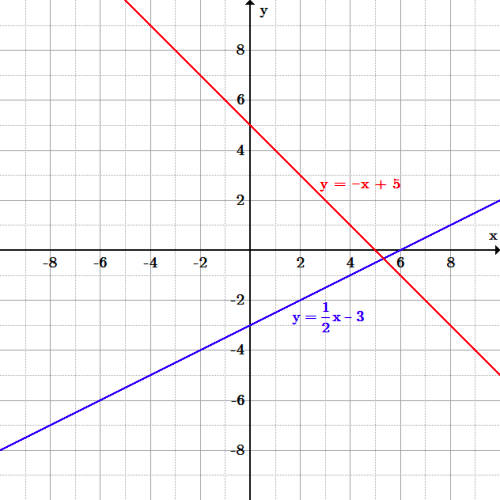

2. ### ReLU
\begin{equation} \text{ReLU}(x) = \max(0, x)\end{equation}

Hàm ReLU thường được đặt giữa các Hidden Layer để xử lí đầu ra từ hàm linear. Hàm này sẽ lọc ra những output > 0. Nếu output < 0, hàm này sẽ trả về 0.

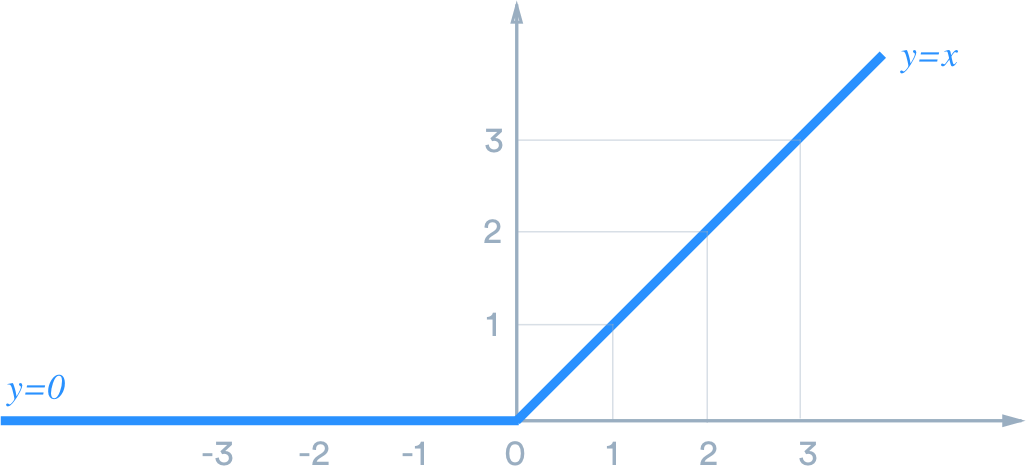

3. ### Sigmoid
\begin{equation} \sigma(x) = \frac{1}{1 + e^{-x}} \end{equation}

Hàm sigmoid được đặt ở lớp cuối cùng của neural network, gọi là output layer. Hàm này sẽ cho ra những kết quả trong khoảng giữa 0 và 1. Đây là hàm quan trọng nhất của bài toán Logistic Regression, vì nó giúp ta xác định được biên giới quyết định (decision boundary).

Trong notebook này, decision boundary của chúng ta sẽ là 0.5. Nếu hàm sigmoid của chúng ta cho ra kết quả > 0.5, khách hàng đó có gửi tiền, Ngược lại, nếu kết quả < 0.5, hành khách đó không gửi tiền.


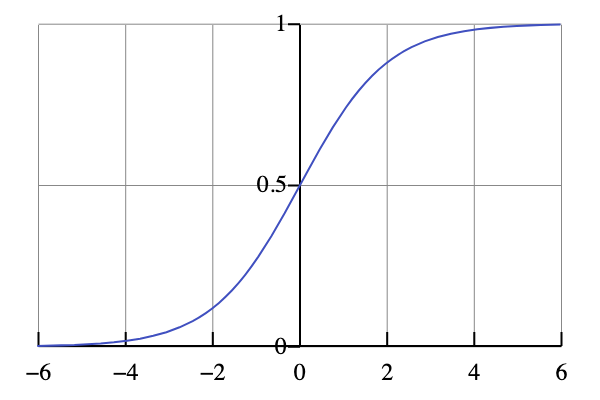

## 3. Lan truyền tịnh tiến (Forward Propagation)

Sau đây ta sẽ cùng phân tích hoạt động của một neural network 2 lớp. Ta sẽ sử dụng thư viện Numpy làm công cụ chủ yếu để xây dựng.

In [5]:
#Tạo hàm sigmoid
def sigmoid(z):
### BEGIN SOLUTION
  return 1/(1 + np.exp(-z))
### END SOLUTION

In [ ]:
# IS REQUIRED FOR GRADING

# Test 20 points: Sigmoid
def test_sigmoid():
  assert sigmoid(0) == 0.5
  ### BEGIN HIDDEN TESTS
  assert sigmoid(2) == 1/(1 + np.exp(-2))
  ### BEGIN HIDDEN TEST
  print("Chúc mừng bạn đã làm đúng!")

In [7]:
test_sigmoid()

Chúc mừng bạn đã làm đúng!


In [8]:
#Tạo hàm ReLU
def ReLU(z):
  ### BEGIN SOLUTION
  return np.maximum(0,z)
  ### END SOLUTION

In [9]:
# IS REQUIRED FOR GRADING

# Test 30 points: ReLU
def test_ReLU():
  assert ReLU(0) == 0, "Hàm ReLU khởi tạo sai"
  assert ReLU(2) == 2, "Hàm ReLU khởi tạo sai"
  assert ReLU(-2) == 0, "Hàm ReLU khởi tạo sai"
  print("Chúc mừng bạn đã làm đúng!")

In [10]:
test_ReLU()

Chúc mừng bạn đã làm đúng!


Đầu tiên ta phải khởi tạo giá trị ban đầu cho các trọng số W1, W2 và độ biến thiên b1, b2. W1 và b1 sẽ phụ trách cho lớp đầu vào, còn W2 và b2 phụ trách lớp thứ 2.

In [11]:
param_url = "https://storage.googleapis.com/skill-pixel-bucket-public-training-data/course-1/user3/2Layers_model_parameters.npz"

saved_params = np.load(io.BytesIO(requests.get(param_url).content))
W1 = saved_params['W1']
b1 = saved_params['b1']
W2 = saved_params['W2']
b2 = saved_params['b2']

Bước tiếp theo là **Forward Propagation**, hay còn gọi là **lan truyền tịnh tiến**. Ở bước này, ta truyền dữ liệu đầu vào model bằng cách đưa chúng qua các hàm theo thứ tự Linear -> ReLU -> Linear -> Sigmoid. Kết quả từ một hàm sẽ là đầu vào cho hàm tiếp theo.   

Vậy ở mỗi lớp, đầu ra A sẽ dựa theo công thức sau:
\begin{equation}Z^i = W^i*A^{i-1} + b^i\end{equation}
\begin{equation}A^i = g(Z^i)\end{equation}
Trong đó, $A^i$ là đầu ra của lớp đang xét, còn $A^{i-1}$ là dầu ra của lớp trước đó. g() đại diện cho **activation function** (phương trình kích hoạt), và nó sẽ lấy $Z^i$ làm biến.  

Đối với bài toán của chúng ta, activation function sẽ là hàm ReLU đối với lớp ẩn và sigmoid đối với lớp đầu ra.

In [15]:
def forward_prop(W1, b1, W2, b2, X):
  ### BEGIN SOLUTION
  Z1 = X.dot(W1) + b1
  A1 = ReLU(Z1)
  Z2 = A1.dot(W2) + b2
  A2 = sigmoid(Z2)
  ### END SOLUTION
  return Z1, A1, Z2, A2

In [16]:
# IS REQUIRED FOR GRADING

# Test 40 points: Forward Propagation
def test_fwd_prop(W1, b1, W2, b2):
  X = np.random.randn(100, 13)
  Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

  ### BEGIN HIDDEN TESTS
  # Check values
  assert np.allclose(Z1, X.dot(W1) + b1), "Bạn đã khởi tạo Z1 sai"
  assert np.allclose(A1, ReLU(Z1)), "Bạn đã khởi tạo A1 sai"
  assert np.allclose(Z2, A1.dot(W2) + b2), "Bạn đã khởi tạo Z2 sai"
  assert np.allclose(A2, sigmoid(Z2)), "Bạn đã khởi tạo A2 sai"
  ###END HIDDEN TESTS

  print("Chúc mừng bạn đã làm đúng!")

In [17]:
test_fwd_prop(W1, b1, W2, b2)

Chúc mừng bạn đã làm đúng!


Bây giờ ta sẽ lưu lại các kết quả của quá trình Forward Propagation

In [18]:
print("Kích thước của trọng số 1:", W1.shape)
print("Kích thước của bias 1:", b1.shape)
print("Kích thước của trọng số 2:", W2.shape)
print("Kích thước của bias  2:", b2.shape)

Kích thước của trọng số 1: (13, 128)
Kích thước của bias 1: (1, 128)
Kích thước của trọng số 2: (128, 1)
Kích thước của bias  2: (1, 1)


## 4. Thử kết quả dự đoán

Sau đây ta sẽ thử cho model của chúng ta dự đoán trên tập X_val. Model chưa được train trên tập này, nên việc đánh giá model dựa trên một tập data mới giúp đánh giá khách quan hơn

In [19]:
X_url = "https://storage.googleapis.com/skill-pixel-bucket-public-training-data/course-1/user3/X_val.npy"
X_val = np.load(io.BytesIO(requests.get(X_url).content))

y_url = "https://storage.googleapis.com/skill-pixel-bucket-public-training-data/course-1/user3/y_val.npy"
y_val = np.load(io.BytesIO(requests.get(y_url).content))

In [20]:
def get_accuracy(y_hat, y):
  predictions = (y_hat >= 0.5).astype(int)
  return np.sum(predictions == y) / len(predictions)

In [21]:
def make_predict(W1, b1, W2, b2, X):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = (A2 >= 0.5).astype(int)
  return predictions

def test_predict(W1, b1, W2, b2, index):
  prediction = make_predict(W1, b1, W2, b2, X_val[index])
  result = "Có gửi tiền" if prediction == 1 else "Không gửi tiền"
  print("Khách hàng số:", index)
  print("Thông tin chung:", X_val[index])
  print("Kết quả dự đoán:", result)
  label = y_val[index][0]
  print("Nhãn (sự thật):", label)

Sau khi chạy cell bên dưới, bạn có thể nhập một số bất kì (nhỏ hơn 8528) để kiếm tra dự đoán của model trên một khách hàng ngẫu nhiên.

In [26]:
customer_id = int(input("Nhập ID khách hàng: "))
test_predict(W1, b1, W2, b2, customer_id)

Khách hàng số: 150
Thông tin chung: [ 0.82212809 -0.28629072 -0.13924412 -0.22309926 -1.16721992 -0.44640155
 -0.1778828  -0.5741732   2.58385613  0.70825307 -0.36302686 -0.6187903
  0.80518941]
Kết quả dự đoán: Không gửi tiền
Nhãn (sự thật): 0


In [25]:
print("Tỉ lệ dự đoán chính xác:",get_accuracy(make_predict(W1, b1, W2, b2, X_val), y_val))

Tỉ lệ dự đoán chính xác: 0.9071294559099438
